In [1]:
import os
import torch
import cv2
from diffusers import StableDiffusionPipeline

c:\Users\nuyhc\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
color_dict = {
    "Joy":"yellow",
    "Panic/Anxiety":"white",
    "Anger":"orange",
    "Sadness/Hurt":"blue",
    "Neutral":"purple"
}

## Setup

In [3]:
model_emotion = torch.hub.load("WongKinYiu/yolov7", "custom", r"./models/model_emotion_estimate.pt", force_reload=True, trust_repo=True)
background_generator = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16)
background_generator = background_generator.to("cuda")
print("Models Load")

Downloading: "https://github.com/WongKinYiu/yolov7/zipball/main" to C:\Users\nuyhc/.cache\torch\hub\main.zip

                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992

Adding autoShape... 


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
c:\Users\nuyhc\anaconda3\envs\torch\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Models Load


## Emotion Estimate

In [ ]:
results = model_emotion(r"C:\Users\nuyhc\Desktop\Avg26_Personal_Color_Performance\test.png").pandas().xyxy[0]
label = results.groupby("name")[["class", "confidence"]].mean().reset_index(drop=False).sort_values("confidence").iloc[-1, 0]
conf = results.groupby("name")[["class", "confidence"]].mean().reset_index(drop=False).sort_values("confidence").iloc[-1, -1]

In [22]:
results = model_emotion("./test3.jpg").pandas().xyxy[0]
label = results.groupby("name")[["class", "confidence"]].mean().reset_index(drop=False).sort_values("confidence").iloc[-1, 0]
conf = results.groupby("name")[["class", "confidence"]].mean().reset_index(drop=False).sort_values("confidence").iloc[-1, -1]

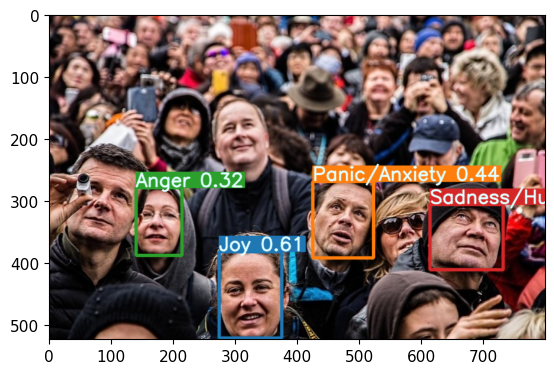

In [16]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

## Background Create

In [48]:
color_dict

{'Joy': 'yellow',
 'Panic/Anxiety': 'white',
 'Anger': 'orange',
 'Sadness/Hurt': 'blue',
 'Neutral': 'purple'}

100%|██████████| 50/50 [00:02<00:00, 22.50it/s]


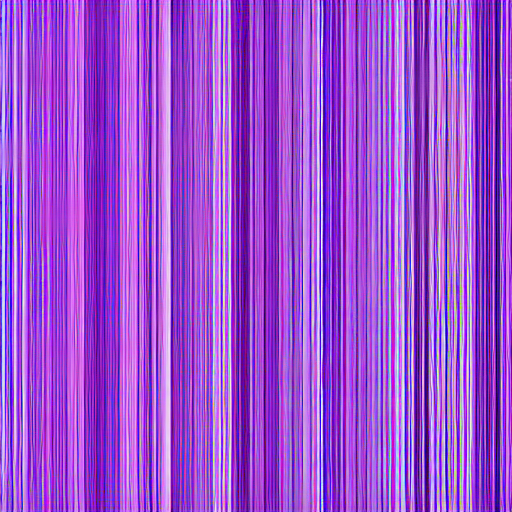

In [56]:
background = background_generator(f"A background with {conf*100:.2f}% {color_dict['Neutral']} for performance").images[0]

background

100%|██████████| 50/50 [00:02<00:00, 22.30it/s]


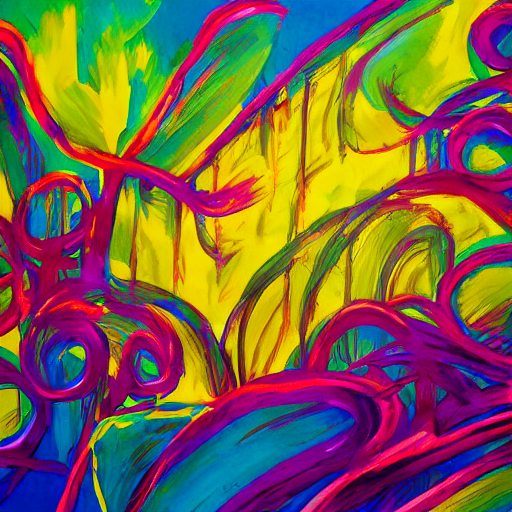

In [21]:
background = background_generator("art style background of feeling the emotion of joy with 30% yellow for performance").images[0]

background

100%|██████████| 50/50 [00:02<00:00, 22.52it/s]


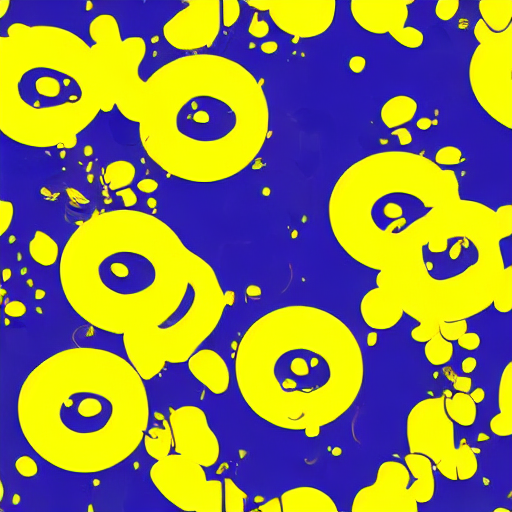

In [17]:
background = background_generator("background of feeling the emotion of joy with 30% yellow for performance").images[0]

background